In [1]:
import numpy as np
data2=np.genfromtxt("/home/zzq/mathmodel/A/a-2.csv",dtype=float,delimiter=',')
print data2.shape

(512, 180)


In [2]:
data1=np.genfromtxt("/home/zzq/mathmodel/A/a-1.csv",dtype=float,delimiter=',')
print data1.shape
#意思就是指点阵上是256*256

(256, 256)


In [3]:
data3=np.genfromtxt("/home/zzq/mathmodel/A/a-3.csv",dtype=float,delimiter=',')
print data3.shape

(512, 180)


In [4]:
data4=np.genfromtxt("/home/zzq/mathmodel/A/a-4.csv",dtype=float,delimiter=',')
print data4.shape
#10个坐标值

(10, 2)


In [5]:
data5=np.genfromtxt("/home/zzq/mathmodel/A/a-5.csv",dtype=float,delimiter=',')
print data5.shape

(512, 180)


In [6]:
dataa_1=np.genfromtxt("/home/zzq/mathmodel/B/b-1.csv",dtype=float,delimiter=',')
print dataa_1.shape

(836, 5)


In [7]:
dataa_2=np.genfromtxt("/home/zzq/mathmodel/B/b-2.csv",dtype=float,delimiter=',')
print dataa_2.shape

(1878, 5)


In [8]:
dataa_3=np.genfromtxt("/home/zzq/mathmodel/B/b-3.csv",dtype=float,delimiter=',')
print dataa_3.shape

(2067, 3)


In [9]:
process_a_1=dataa_1[1:,1:]
print process_a_1.shape

(835, 4)


In [10]:
print process_a_1[0]

[  22.56614225  113.98083678   66.            0.        ]


In [12]:
print process_a_1[:,0].max()

23.8783980647


In [13]:
print process_a_1[:,0].min()
#经度的最大最小值

22.4930831268


In [14]:
#维度的最大最小值
print process_a_1[:,1].max()
print process_a_1[:,1].min()

114.493609587
112.683258303


In [15]:
dict={}
price=process_a_1[:,2]
for i in range(len(price)):
    if dict.has_key(price[i]):
        dict[price[i]]+=1
    else:
        dict[price[i]]=1

In [16]:
print len(dict)

23


In [17]:
print dict

{65.5: 150, 66.5: 63, 69.5: 8, 73.5: 5, 67.5: 23, 72.5: 9, 74.5: 2, 65.0: 65, 66.0: 103, 67.0: 38, 68.0: 30, 69.0: 19, 70.0: 96, 71.0: 4, 72.0: 60, 73.0: 10, 74.0: 5, 75.0: 78, 80.0: 13, 85.0: 27, 68.5: 11, 70.5: 11, 71.5: 5}


In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
x=[]
y=[]
x=dict.keys()
y=dict.values()
print len(x)
print len(y)

23
23


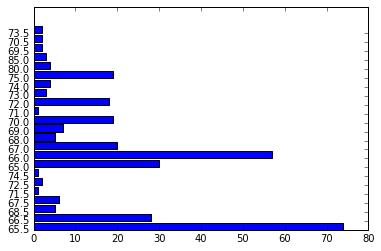

In [47]:
plt.barh(range(len(y)), y,tick_label=labels)
plt.savefig('/home/zzq/mathmodel/B/标价图.png')
plt.show()

In [36]:
ifdone=process_a_1[:,-1]
print len(ifdone)

835


In [37]:
havedone={}
nothavedone={}
ifdone=process_a_1[:,-1]
for i in range(len(ifdone)):
    if ifdone[i]==1:
        if havedone.has_key(price[i]):
            havedone[price[i]]+=1
        else:
            havedone[price[i]]=1
    else:
        if nothavedone.has_key(price[i]):
            nothavedone[price[i]]+=1
        else:
            nothavedone[price[i]]=1

In [38]:
print len(nothavedone)
print len(havedone)

23
23


In [40]:
print nothavedone

{65.5: 74, 66.5: 28, 68.5: 5, 67.5: 6, 71.5: 1, 72.5: 2, 74.5: 1, 65.0: 30, 66.0: 57, 67.0: 20, 68.0: 5, 69.0: 7, 70.0: 19, 71.0: 1, 72.0: 18, 73.0: 3, 74.0: 4, 75.0: 19, 80.0: 4, 85.0: 3, 69.5: 2, 70.5: 2, 73.5: 2}


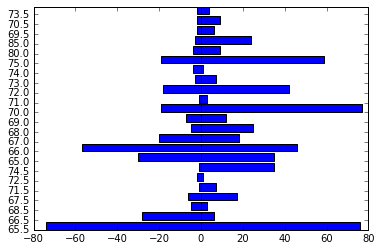

In [45]:
x=havedone.values()
y=nothavedone.values()
x=np.array(x)
y=np.array(y)
labels=nothavedone.keys()
plt.barh(range(len(nothavedone)), x,tick_label=labels)
plt.barh(range(len(havedone)), -y)

plt.savefig('/home/zzq/mathmodel/B/是否成交和价钱关系.png')
plt.show()

In [76]:
x=process_a_1[:,0]
y=process_a_1[:,1]
max_x=x.max()
min_x=x.min()
max_y=y.max()
min_y=y.min()
x_point=[]
y_point=[]
for i in range(len(x)):
    x_point.append(int((x[i]-min_x)/(max_x-min_x)*256))
    y_point.append(int((y[i]-min_y)/(max_y-min_y)*256))

In [77]:
matrix=np.zeros((256,256))
for i in range(len(x)):
    matrix[x_point[i]-1][y_point[i]-1]+=1

In [79]:
print np.max(matrix)

4.0


In [81]:
for i in range(256):
    for j in range(256):
        matrix[i][j]=(matrix[i][j]/4.0)*255.0

In [82]:
print np.shape(matrix)
print type(matrix)
matrix_back=matrix

(256, 256)
<type 'numpy.ndarray'>


In [83]:
from pylab import *
from PIL import Image
from skimage import io,data
im=Image.fromarray(matrix_back).convert('L')
im.save('/home/zzq/mathmodel/B/交易区域图.png')

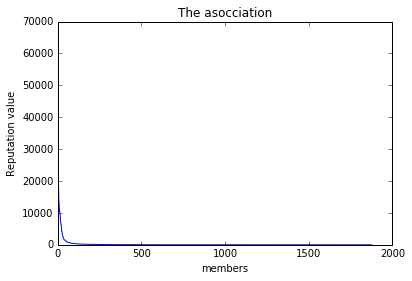

In [88]:
data2=np.genfromtxt("/home/zzq/mathmodel/B/b-2.csv",dtype=float,delimiter=',')
y=data2[1:,4]
x=np.linspace(0,1877,num=1877)
plt.plot(x, y)
plt.xlabel('members')
plt.ylabel('Reputation value')
title('The asocciation')
plt.savefig('/home/zzq/mathmodel/B/会员信誉值.png')

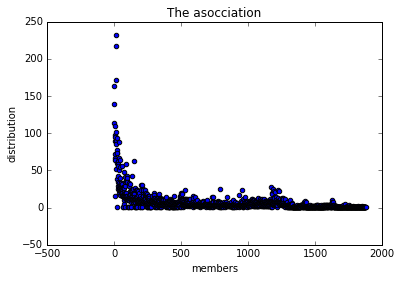

In [101]:
data2=np.genfromtxt("/home/zzq/mathmodel/B/b-2.csv",dtype=float,delimiter=',')
y=data2[1:,2]
x=np.linspace(0,1877,num=1877)
plt.scatter(x, y)
plt.xlabel('members')
plt.ylabel('distribution')
title('The asocciation')
plt.savefig('/home/zzq/mathmodel/B/会员预订任务限额散点图.png')

In [124]:
def location(x,y,pixel,name):
    max_x=x.max()
    min_x=x.min()
    max_y=y.max()
    min_y=y.min()
    x_point=[]
    y_point=[]
    for i in range(len(x)):
        x_point.append(int((x[i]-min_x)/(max_x-min_x)*256))
        y_point.append(int((y[i]-min_y)/(max_y-min_y)*256))
    matrix_=np.zeros((pixel,pixel))
    for i in range(len(x)):
        matrix_[x_point[i]-1][y_point[i]-1]+=1
    for i in range(pixel):
        for j in range(pixel):
            matrix_[i][j]=(matrix_[i][j]/np.max(matrix_))*255.0
    matrix_back=matrix_
    im=Image.fromarray(matrix_back).convert('L')
    im.save(name)

In [102]:
data2=np.genfromtxt("/home/zzq/mathmodel/B/b-2.csv",dtype=str,delimiter=',')
x=data2[1:,1]
print x

['22.947097 113.679983' '22.577792 113.966524' '23.192458 113.347272' ...,
 '23.333446 113.301736' '22.693506 113.994101' '23.133238 113.239864']


In [117]:
my_x=[]
my_y=[]
for i in range(len(x)):
    nn=x[i].split(' ')
    x_=float(nn[0])
    y_=float(nn[1])
    if x_<24 and y_<115: 
        my_x.append(x_)
        my_y.append(y_)
        continue

In [118]:
print len(my_x)
print len(my_y)
print my_x[4]

1870
1870
22.262784


In [125]:
my_x=np.array(my_x)
my_y=np.array(my_y)
location(my_x,my_y,256,'/home/zzq/mathmodel/B/会员位置图.png')

In [128]:
data3=np.genfromtxt("/home/zzq/mathmodel/B/b-3.csv",dtype=float,delimiter=',')
x=data3[1:,1]
y=data3[1:,2]

location(x,y,256,'/home/zzq/mathmodel/B/分配位置图.png')

In [1]:
data1=np.genfromtxt("/home/zzq/mathmodel/B/b-1.csv",dtype=float,delimiter=',')
x=data1[1:,1]
y=data1[1:,2]
z=data1[1:,3]
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
x,y = np.meshgrid(x, y)
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='rainbow')

NameError: name 'np' is not defined